Mini Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow import keras
import tensorflow as tf
import seaborn as sn

In [2]:
(x1,y1),(x2,y2)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x1.shape

(50000, 32, 32, 3)

In [4]:
x2.shape

(10000, 32, 32, 3)

In [5]:
y1.shape,y2.shape

((50000, 1), (10000, 1))

In [6]:
y1[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y1=y1.reshape(-1,)
y2=y2.reshape(-1,)

In [8]:
y1[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

return the image

In [20]:
def plot(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

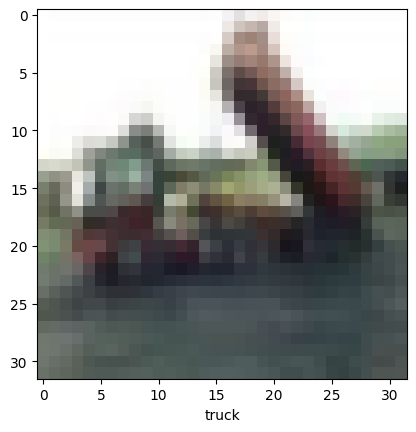

In [11]:
plot(x1,y1,2)

Scaling the dataset

In [12]:
x1=x1/255
x2=x2/255

Artificial Neural Network

In [14]:
from keras.api._v2.keras import activations
ann=tf.keras.Sequential([
    keras.layers.Flatten(input_shape=( 32, 32, 3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
ann.fit(x1,y1,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 343s 218ms/step - loss: 1.8757 - accuracy: 0.3306
Epoch 2/5
1563/1563 [==============================] - 314s 201ms/step - loss: 1.6554 - accuracy: 0.4096
Epoch 3/5
1563/1563 [==============================] - 308s 197ms/step - loss: 1.5787 - accuracy: 0.4348
Epoch 4/5
1563/1563 [==============================] - 307s 197ms/step - loss: 1.5235 - accuracy: 0.4540
Epoch 5/5
1563/1563 [==============================] - 308s 197ms/step - loss: 1.4861 - accuracy: 0.4673


Using convolutional Neural Network

In [16]:
ann=tf.keras.Sequential([
    keras.layers.Conv2D(filters=45,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=70,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
ann.fit(x1,y1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 1.3858 - accuracy: 0.5072
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0459 - accuracy: 0.6337
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9047 - accuracy: 0.6867
Epoch 4/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.8074 - accuracy: 0.7195
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7181 - accuracy: 0.7498
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.6424 - accuracy: 0.7751
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5787 - accuracy: 0.7988
Epoch 8/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.5198 - accuracy: 0.8164
Epoch 9/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.4597 - accuracy: 0.8381
Epoch 10/10
1563/1563 [==============================] - 92s 59m

We can say that the CNN works better than the ANN

In [18]:
from sklearn.metrics import classification_report
y_prid=[np.argmax(i) for i in ann.predict(x2)]

313/313 [==============================] - 6s 18ms/step


In [19]:
print(classification_report(y2,y_prid))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.84      0.80      0.82      1000
           2       0.59      0.58      0.58      1000
           3       0.54      0.49      0.51      1000
           4       0.60      0.70      0.64      1000
           5       0.66      0.57      0.61      1000
           6       0.76      0.80      0.78      1000
           7       0.73      0.78      0.75      1000
           8       0.84      0.79      0.81      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

